# Colab #1
Installation instructions for pyKasso on Google Colab.

## Installation

### pyKasso installation

In [ ]:
!pip install -e git+https://github.com/randlab/pyKasso.git@dev#egg=pykasso[analysis,visualization,trame]

### Conda installation

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

### HFM installation

In [ ]:
!conda config --add channels agd-lbr
!conda install hfm

### Cupy installation

In [ ]:
!pip install cupy-cuda11x
!apt install nvidia-cuda-toolkit

### Misc

!apt install libgl1-mesa-glx xvfb
import pyvista as pv
pv.start_xvfb()

## Initialization

In [1]:
# Import pyKasso and other useful packages
import pykasso as pk
import numpy as np

In [2]:
# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0' : 0,
    'y0' : 0,
    'z0' : 0,
    'nx' : 100,
    'ny' : 50,
    'nz' : 50,
    'dx' : 10,
    'dy' : 10,
    'dz' : 10
}

# Create a new project and declare its parameters
app.new_project(project_name='colab_01', grid_parameters=grid_parameters)
app.visualizer.notebook = True

In [3]:
# Declare the model parameters
model_parameters = {
    'sks' : {
        'seed' : 1111,
    },
    'outlets' : {
        'number'     : 1,
        'data'       : [[994, 250]],
        'importance' : [1],
        'subdomain'  : 'domain_bottom',
    },
    'inlets' : {
        'number'     : 1,
        'data'       : [[-5, 250]],
        'per_outlet' : [1],
        'importance' : [1],
        'subdomain'  : 'domain_surface',
    },
}

## Simulation

In [4]:
# Compute simulations
for algorithm in ['Isotropic3', 'Riemann3']:
    model_parameters['sks']['algorithm'] = algorithm
    app.model.generate(model_parameters)

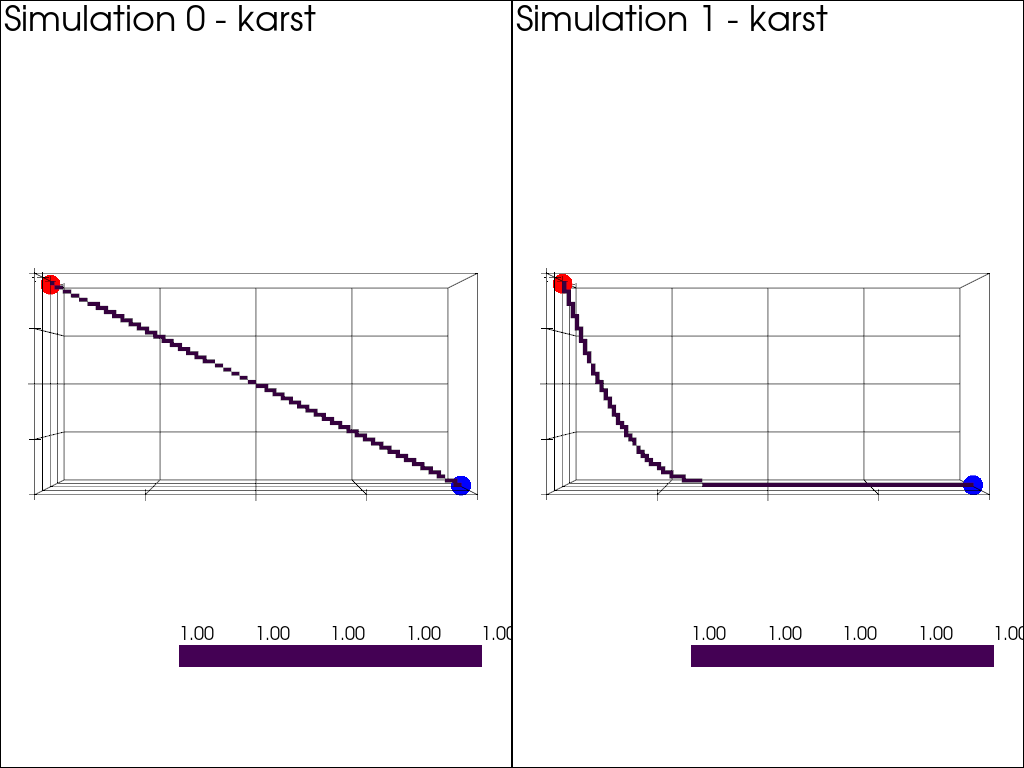

In [5]:
# Visualize the results
settings = {
    'ghost_values': [0],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
}
last_simulations = app.project.get_last_simulations(2)
app.visualizer.pv_show(simulations=last_simulations,
                       features=['karst'],
                       settings=settings)